In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


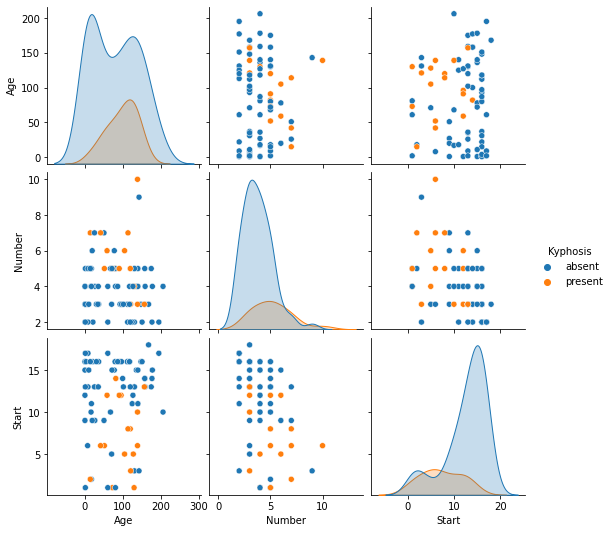

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Age', 'Number', 'Start']] #df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17  4]
 [ 2  2]]


              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

    accuracy                           0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
rfc_predict = rfc.predict(X_test)

In [18]:
print(confusion_matrix(y_test,rfc_predict))
print('\n')
print(classification_report(y_test,rfc_predict))

[[17  4]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.85      0.81      0.83        21
     present       0.20      0.25      0.22         4

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.75      0.72      0.73        25



In [19]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

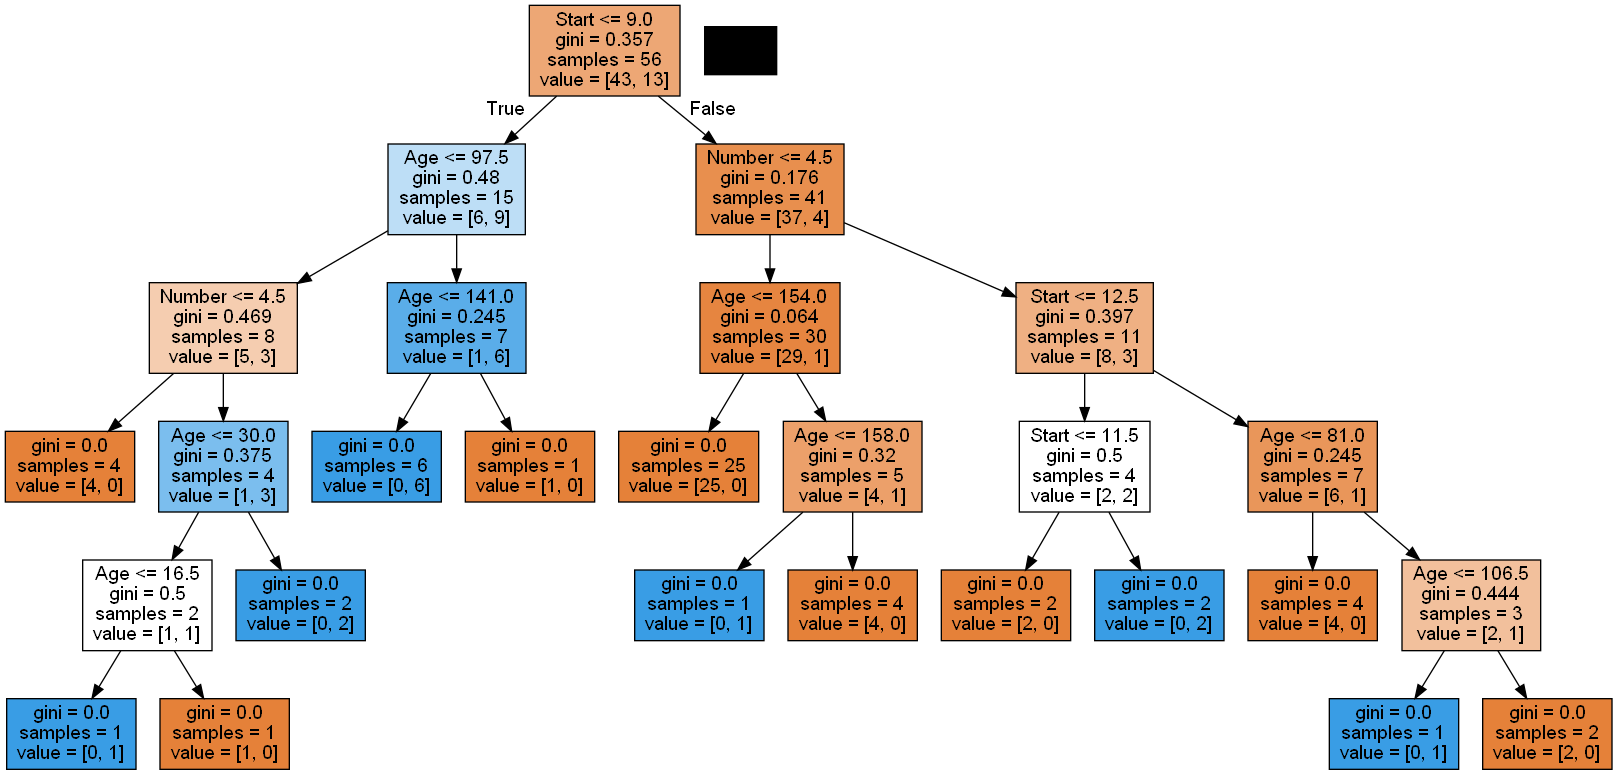

In [21]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())